##1- Classification with IRIS Dataset


In [7]:
#it is a popular dataset and can be find in the sklearn
from sklearn.datasets import load_iris
iris = load_iris()
#data of iris are in iris.data (ndarray)
print iris.data[1:5,:]
print type(iris.data)

[[ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
<type 'numpy.ndarray'>


In [93]:
#it is also possible to get the data from web
import pandas as pd
colnames=["sepal_length", "sepal_width","petal_length", "petal_width","class"]
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=colnames)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##converting class to numeric values

In [94]:
#using dictionary comprehension to convert the 
classes= df["class"].unique()#3 unique classes
print classes

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [95]:
#convert to list in order to use the index
classes =list(classes)
reclassify ={flowertype:classes.index(flowertype) for flowertype in classes}
print reclassify

{'Iris-virginica': 2, 'Iris-setosa': 0, 'Iris-versicolor': 1}


In [96]:
df["reclass"] = df["class"].map(lambda x:reclassify[x])

##deleting class col

In [97]:
df.drop("class",axis=1, inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,reclass
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Beginning Classification
**Four requirements for SKlearn**
1. features and target must be numeric
2. features and target must be ndarray 
3. features shape must be n*m and target must be n*1 (n,)
4. X for features and y for target

In [98]:
y = df["reclass"]
print "y: ",y.shape
X = df.iloc[:, :4]
print "x: ", X.shape

y:  (150L,)
x:  (150, 4)


##four steps of using models in SciKit-Learn
1. import the model
2. instantiate the estimator
3. fit the model
4. predict

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X,y)
print knn.predict([1,1,1,5])
print knn.predict([[2,2,3,4],[5,5,3,3]])
#print knn #displays all defulat values

[0]
[1 1]


##trying different tuning parameter (hyperparameter)

In [100]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
print knn.predict([1,1,1,5])
print knn.predict([[2,2,3,4],[5,5,3,3]])
#print knn #displays all defulat values

[0]
[2 1]


##trying another classifier

In [101]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=100)
clf.fit(X,y)
print clf.predict([1,1,1,5])
print clf.predict([[2,2,3,4],[5,5,3,3]])
#print knn #displays all defulat values

[2]
[2 0]


In [91]:
print clf

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)


##useful link from SciKit-Learn
[KNN classification][1]
[1]:http://scikit-learn.org/stable/modules/neighbors.html

##using entire dataset for validation

In [104]:
y_pred = clf.predict(X)
y_pred.shape

(150L,)

In [119]:
test=pd.DataFrame(data={"Original":y,"Predicted":y_pred})
test.head()

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


##Classification Accuracy

In [121]:
from sklearn.metrics import metrics
print metrics.accuracy_score(y, y_pred)

0.98


##Train/test split

In [122]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

In [124]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_predict_test = log.predict(X_test)
print metrics.accuracy_score(y_test, y_predict_test)

0.966666666667


In [127]:
knn =KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.95


##test for many K (k in range(1:25))

In [134]:
k=range(1,25)
Xtrain, Xtest, ytrain, ytest =train_test_split(X, y,test_size=.3)
scores=[]
for n in k:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    scores.append(metrics.accuracy_score(ytest, ypred))


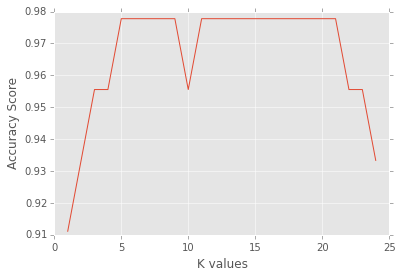

In [138]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.plot(k, scores)
plt.xlabel("K values")
plt.ylabel("Accuracy Score")

##after finding the best tuning parameter you need to use all data points for retraining the model

##Train/test split provides high variance estimate for out of sample data
##Cross-validation come into play